In [1]:
# imports.py
from imports import *

# plotting magic
%matplotlib inline

# custom mods
import tidy
import model_h
import wrangle

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df=tidy.explore_df()
df.info()

cached csv
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2807 entries, 2014-09-17 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2807 non-null   float64
 1   high                2807 non-null   float64
 2   low                 2807 non-null   float64
 3   close               2807 non-null   float64
 4   volume              2807 non-null   int64  
 5   fwd_log_ret         2807 non-null   float64
 6   fwd_ret             2807 non-null   float64
 7   fwd_pct_chg         2807 non-null   float64
 8   fwd_close_positive  2807 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 200.1 KB


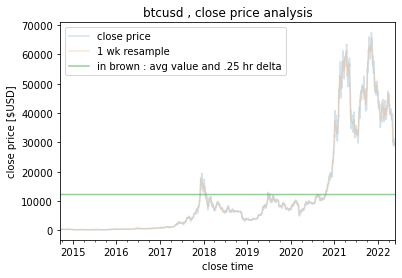

In [3]:
model_h.print_btcusd(df)

In [4]:
df.head()

,open,high,low,close,volume,fwd_log_ret,fwd_ret,fwd_pct_chg,fwd_close_positive
date,,,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,-0.074643,-32.894013,-0.071926,False
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,-0.072402,-29.644012,-0.069843,False
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.035111,14.108002,0.035735,True
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,-0.024968,-10.082978,-0.024659,False
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.008317,3.330994,0.008352,True


<AxesSubplot:xlabel='date'>

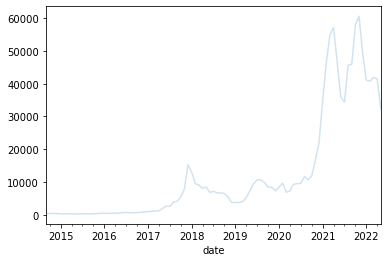

In [5]:
df.close.resample('m').mean().plot(alpha=.2, label='resample')

In [6]:
# model_h.d_stats_btcusd(df)

In [7]:
def split_i(df):
	train = df.loc[:'2022-3-22']
	validate =df.loc['2022-03-23':'2022-04-23'] 
	return train, validate

In [8]:
def split_ii(df):
	train = df.loc[:'2022-04-24']
	test = df.loc['2022-04-25':]
	return train, test

In [9]:
train_i, validate=split_i(df)
train_i.info(),validate.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2744 entries, 2014-09-17 00:00:00+00:00 to 2022-03-22 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2744 non-null   float64
 1   high                2744 non-null   float64
 2   low                 2744 non-null   float64
 3   close               2744 non-null   float64
 4   volume              2744 non-null   int64  
 5   fwd_log_ret         2744 non-null   float64
 6   fwd_ret             2744 non-null   float64
 7   fwd_pct_chg         2744 non-null   float64
 8   fwd_close_positive  2744 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 195.6 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2022-03-23 00:00:00+00:00 to 2022-04-23 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

(None, None)

In [10]:
train_ii, test=split_ii(df)
train_ii.info(),test.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2777 entries, 2014-09-17 00:00:00+00:00 to 2022-04-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                2777 non-null   float64
 1   high                2777 non-null   float64
 2   low                 2777 non-null   float64
 3   close               2777 non-null   float64
 4   volume              2777 non-null   int64  
 5   fwd_log_ret         2777 non-null   float64
 6   fwd_ret             2777 non-null   float64
 7   fwd_pct_chg         2777 non-null   float64
 8   fwd_close_positive  2777 non-null   bool   
dtypes: bool(1), float64(7), int64(1)
memory usage: 198.0 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 30 entries, 2022-04-25 00:00:00+00:00 to 2022-05-24 00:00:00+00:00
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  ----

(None, None)

In [11]:
df.fwd_log_ret.sum()

4.17316149094532

In [12]:
df.close[-1]-df.close[0]

# this is ROI if you bought 1 btc in 2014-09-17 and sold in 2022-05-24

29198.251923

In [13]:
df.index[0].date()

datetime.date(2014, 9, 17)

In [14]:
def macd_df(df):
	'''
	macd encoder
	'''
	macd, signal, histo = talib.MACD(df.close,fastperiod=12, slowperiod=26, signalperiod=9)
	mac=pd.concat([df,macd,signal,histo],axis=1)
	mac=mac.rename(columns={0:'macd',1:'signal',2:'histo'})
	mac=mac.drop(mac[mac.index<'2014-10-20'].index)
	mac=mac.fillna(0)
	cools=mac.histo>0
	start=cools[0]
	not_list=[]

	for x in cools:
		if x:
			not_list.append(1)
		else:
			not_list.append(0)

	not_list=pd.Series(not_list, index=mac.index)
	bools=mac.macd>mac.signal
	yesterday=bools[0]
	list=[]

	for today in bools:
		if today==yesterday:
			list.append(0)
			continue
		else:
			list.append(1)
			yesterday=today

	list=pd.Series(list, index=mac.index)

	# crossover indicator
	macker=pd.concat([mac.close,list,not_list],axis=1)
	macker=macker.rename({0:'cross',1:'histy'},axis=1)

	return macker, mac

macker, mac=macd_df(df)

In [15]:
def macd_roi(df):
	buy=[]
	sell=[]
	for i in df.index:
		if df.loc[i].cross > 0:
			if df.loc[i].histy > 0:
				buy.append(df.loc[i].close)
				sell.append(0)
			else:
				buy.append(0)
				sell.append(df.loc[i].close)
		else:
			continue
	return buy,sell

In [16]:
buy,sell=macd_roi(macker)

In [17]:
profits=pd.DataFrame({'buy':buy,'sell':sell})

In [18]:
if profits.buy.loc[0] == 0:
	profits=profits.drop(0)
	profits.sell=profits.sell.shift(-1)
else:
	profits.sell=profits.sell.shift(-1)

In [19]:
(profits.sell-profits.buy).sum()

36491.43405399999

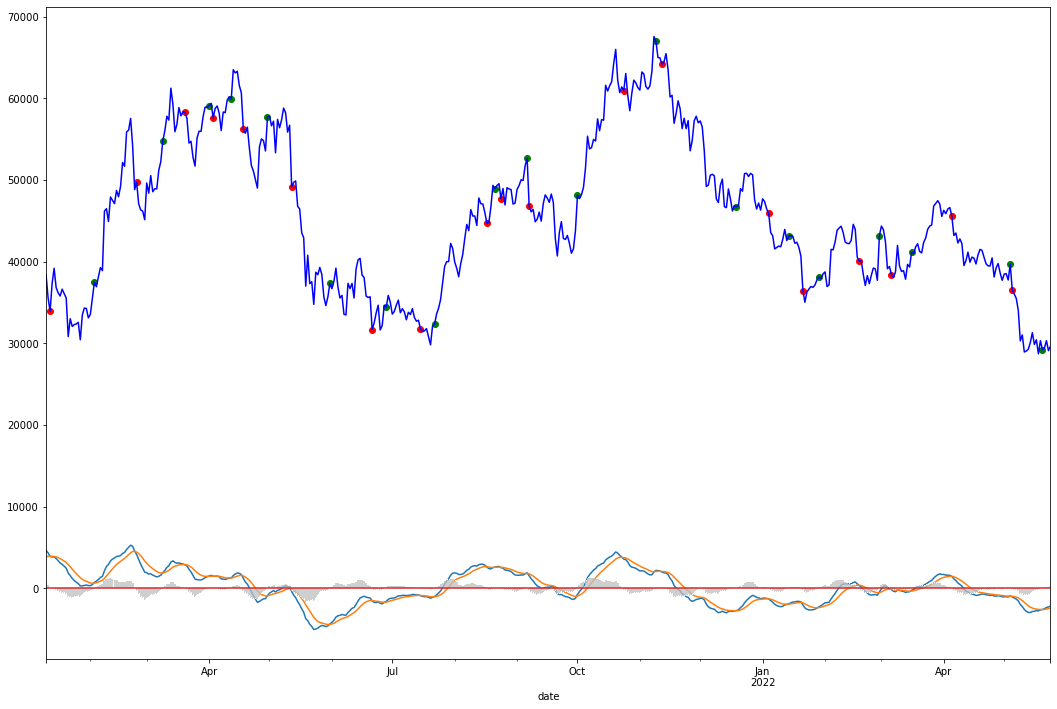

In [20]:
plt.figure(figsize=[18,12])
mac.macd.tail(500).plot()
mac.signal.tail(500).plot()
plt.stem(mac.index[-500:],mac['histo'].tail(500),linefmt='silver',markerfmt='w,')
_=macker[(macker.cross==1)&(macker.histy==1)].tail(500)
plt.scatter(y=_.close,x=_.index,c='green')
_=macker[(macker.cross==1)&(macker.histy==0)].tail(500)
plt.scatter(y=_.close,x=_.index,c='red')
macker.close.tail(500).plot(color='blue')
plt.show()


#wip


In [21]:
df = wrangle.wrangle_df()

cached csv


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2774 entries, 2014-10-20 to 2022-05-24
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   open                          2774 non-null   float64
 1   high                          2774 non-null   float64
 2   low                           2774 non-null   float64
 3   close                         2774 non-null   float64
 4   volume                        2774 non-null   int64  
 5   fwd_log_ret                   2774 non-null   float64
 6   fwd_ret                       2774 non-null   float64
 7   fwd_pct_chg                   2774 non-null   float64
 8   fwd_close_positive            2774 non-null   int64  
 9   cross                         2774 non-null   float64
 10  histy                         2774 non-null   float64
 11  month_9                       2774 non-null   int64  
 12  month_10                      2774 non-null 

In [23]:
X=df[['open', 'high', 'low', 'close', 'volume',  'cross', 'histy', 'month_9', 'month_10', 'day_20', 'day_1', 'day_9', 'atr_above_threshold_0.01', 'atr_above_threshold_0.05', 'atr_above_threshold_0.1', 'atr_above_threshold_0.2', 'atr_above_threshold_0.3', 'avg-fees-per-transaction', 'cost-per-transaction-percent', 'cost-per-transaction', 'difficulty', 'hash-rate', 'miners-revenue', 'transaction-fees-to-miners']]

In [24]:
X=pd.DataFrame(X)

In [27]:
X_train, X_val=tidy.split_i(X)

In [29]:
len(X_train)

2711

In [31]:
y=df[['fwd_log_ret', 'fwd_ret', 'fwd_pct_chg', 'fwd_close_positive']]

In [47]:
X.open.dtype

dtype('float64')

In [45]:
for col in X.open:
	if X[[col]] == float64:
		X[[col]]=
	print(col)

389.230988
382.42099
386.118011
382.962006
358.591003
358.610992
347.487
354.777008
353.214996
357.088989
335.709015
345.009003
338.649994
326.075012
325.569
327.161011
330.683014
339.458008
349.817993
342.153992
345.376007
362.265015
365.856995
367.984985
427.27301
418.416992
399.649994
374.730011
388.348999
387.785004
373.895996
380.307007
357.878998
351.604004
353.174988
366.947998
376.885986
376.019012
370.502014
369.373993
376.152008
375.51001
378.248993
379.25
381.721985
375.717987
369.441986
376.756989
374.835999
374.964996
361.894989
352.204987
344.339996
350.833008
352.381012
346.72699
351.360992
345.673004
326.855011
319.785004
311.178986
317.618988
329.542999
321.067993
332.016998
334.38501
322.286011
319.152008
327.583008
316.160004
317.700989
312.718994
310.914001
320.434998
314.07901
314.846008
281.145996
265.084015
274.610992
286.076996
294.13501
282.382996
287.303009
274.608002
266.145996
267.394012
223.893997
176.897003
209.070007
207.834
200.050003
211.470993
212.9069

In [ ]:
X = StandardScaler().fit_transform(df)

In [30]:
X.head()

,open,high,low,close,volume,cross,histy,month_9,month_10,day_20,day_1,day_9,atr_above_threshold_0.01,atr_above_threshold_0.05,atr_above_threshold_0.1,atr_above_threshold_0.2,atr_above_threshold_0.3,avg-fees-per-transaction,cost-per-transaction-percent,cost-per-transaction,difficulty,hash-rate,miners-revenue,transaction-fees-to-miners
2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,0.0,1.0,0,1,1,0,0,False,False,False,False,False,0.059651,2.830044,24.826121,3.500248e+10,233157.697776,1.747486e+06,4198.799233
2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,0.0,1.0,0,1,0,0,0,False,False,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,233157.697776,1.903490e+06,5726.216590
2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,0.0,1.0,0,1,0,0,0,False,False,False,False,False,0.060749,2.830044,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900,0.0,1.0,0,1,0,0,0,False,False,False,False,False,0.060749,2.566983,20.194035,3.500248e+10,297537.062088,1.903490e+06,5726.216590
2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700,0.0,1.0,0,1,0,0,0,False,False,False,False,False,0.056403,2.566983,18.762679,3.500248e+10,297537.062088,1.603290e+06,4819.681933
